# ECE 271A HW \#2 The Cheetah Problem (Continued)

In [1]:
import numpy as np
from scipy.io import loadmat
m = loadmat('TrainingSamplesDCT_8_new.mat')

In [2]:
m

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Oct 14 00:15:17 2003',
 '__version__': '1.0',
 '__globals__': [],
 'TrainsampleDCT_FG': array([[ 1.31421569e+00, -3.38342563e-01, -8.63802055e-03, ...,
          4.10067525e-03, -1.70351467e-03, -7.18715755e-04],
        [ 1.29019608e+00,  7.55571684e-02, -1.32556382e-03, ...,
         -5.91367766e-04,  6.99808599e-04, -1.88116338e-03],
        [ 1.37058824e+00, -5.93696510e-02, -2.91769678e-02, ...,
          1.12866025e-02,  4.81607195e-04, -2.02858893e-03],
        ...,
        [ 7.62745098e-01, -8.55425076e-02, -6.24151651e-02, ...,
          2.43027108e-04, -6.79088811e-05, -7.22771715e-04],
        [ 8.62254902e-01, -2.31167821e-01,  1.73543271e-01, ...,
         -6.83837231e-03,  4.96790803e-05,  1.25805753e-03],
        [ 2.66568627e+00,  1.40228604e-01, -2.02514221e-01, ...,
          3.75502023e-03, -1.52054142e-03,  2.08619970e-03]]),
 'TrainsampleDCT_BG': array([[ 2.27892157e+00, -8.82044615e-02, -9.9302

In [3]:
foreground,background = m['TrainsampleDCT_FG'],m['TrainsampleDCT_BG']

#### The computation of the prior distribution is the same as last time, given that the maximum likelihood estimation of prior probability of class A is (# of observations of class A / total # of observations). 

In [4]:
total = foreground.shape[0] + background.shape[0]
prior_cheetah = foreground.shape[0] / total
prior_grass = background.shape[0] / total
print(prior_cheetah)
print(prior_grass)

0.1918649270913277
0.8081350729086723


#### Given that class-conditional densities are multivariate Gaussians of 64 dimensions and Gaussian Distribution is among the exponential family, the MLE for the parameters (mean,varience,covariance) will be sample-mean and sample-varience and sample-covariance.

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
#MLE for foreground
N = foreground.shape[0]
base_FG = np.zeros(foreground.shape[1]) + (-N/2 * np.log(2 * np.pi))
mean_FG = np.mean(foreground,axis = 0)
var_FG = np.var(foreground,axis = 0)
se_FG = np.sqrt(var_FG)
cov_FG = np.cov(foreground.T)
temp = np.sum((foreground - mean_FG / np.sqrt(var_FG)) ** 2,axis = 0)
MLE_FG_log = base_FG - N * np.log(var_FG) - 0.5 * temp

In [6]:
#MLE for background
N = background.shape[1]
base_BG = np.zeros(background.shape[1]) + (-N/2 * np.log(2 * np.pi))
mean_BG = np.mean(background,axis = 0)
var_BG = np.var(background,axis = 0)
se_BG = np.sqrt(var_BG)
cov_BG = np.cov(background.T)
temp = np.sum((background - mean_BG / np.sqrt(var_BG)) ** 2,axis = 0)
MLE_BG = base_BG - N * np.log(var_BG) - 0.5 * temp

In [7]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(q / p), 0))

#### Marginal Density Plot for two classes.

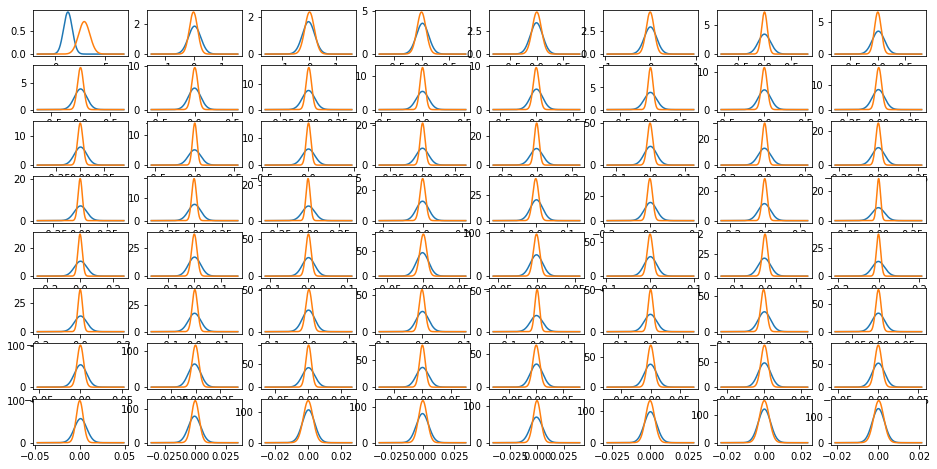

In [42]:
#marginal density plot
from scipy.stats import norm
from scipy.special import kl_div
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,8))
KL_distance = []
mean_distance = np.zeros(foreground.shape[1])
for i in range(foreground.shape[1]):
    fig.add_subplot(8,8,i+1)
    x_FG = np.linspace(mean_FG[i] - 7 * se_FG[i] ,mean_FG[i] + 7 * se_FG[i],500)
    x_BG = np.linspace(mean_BG[i] - 7 * se_BG[i], mean_BG[i] + 7 * se_BG[i],500)
    x = np.sort(np.array([x_FG,x_BG]),axis = None)
    y_cheetah = norm.pdf(x,mean_FG[i],se_FG[i])
    y_grass = norm.pdf(x,mean_BG[i],se_BG[i])
    KL = kl_divergence(y_grass,y_cheetah)
    KL_distance.append(KL)
    mean_distance[i] = abs(mean_FG[i] - mean_BG[i])
    plt.plot(x,y_cheetah,x,y_grass)
#     title = "Fit result for the %d feature" %(i+1)
#     plt.title(title)
plt.show()

In [9]:
KL_distance = np.array(KL_distance)
KL_sorted = np.argsort(KL_distance)
mean_distance_sorted = np.argsort(mean_distance)

#### By visual inspection, the best 8 and the worst 8 features are as follow. The criteria for the selection is based on whether the foreground and background probability distribution is well seperated under a specific dimension (feature).

In [12]:
best_8 = [0,17,24,26,31,37,39,41]
worst_8 = [2,3,4,5,59,60,62,63]

#### Plots for best 8 features and worst 8 features.

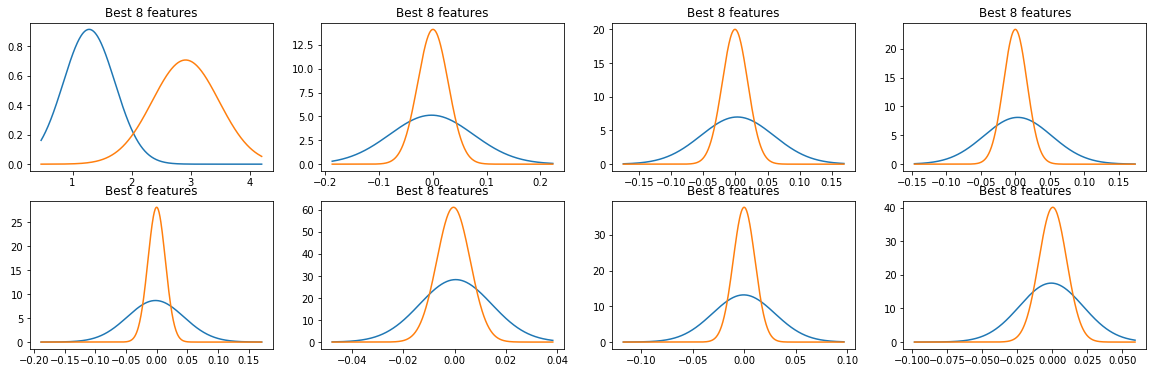

In [25]:
fig2=plt.figure(figsize=(20,6))
for i in range(len(best_8)):
    fig2.add_subplot(2,4,i+1)
    x_min = min(min(foreground.T[best_8[i]]),min(background.T[best_8[i]]))
    x_max = max(max(foreground.T[best_8[i]]),max(background.T[best_8[i]]))
    x = np.linspace(x_min,x_max,500)
    y_cheetah = norm.pdf(x,mean_FG[best_8[i]],np.sqrt(var_FG[best_8[i]]))
    y_grass = norm.pdf(x,mean_BG[best_8[i]],np.sqrt(var_BG[best_8[i]]))
    plt.plot(x,y_cheetah,x,y_grass)
    title = "Best 8 features"
    plt.title(title)
plt.show()

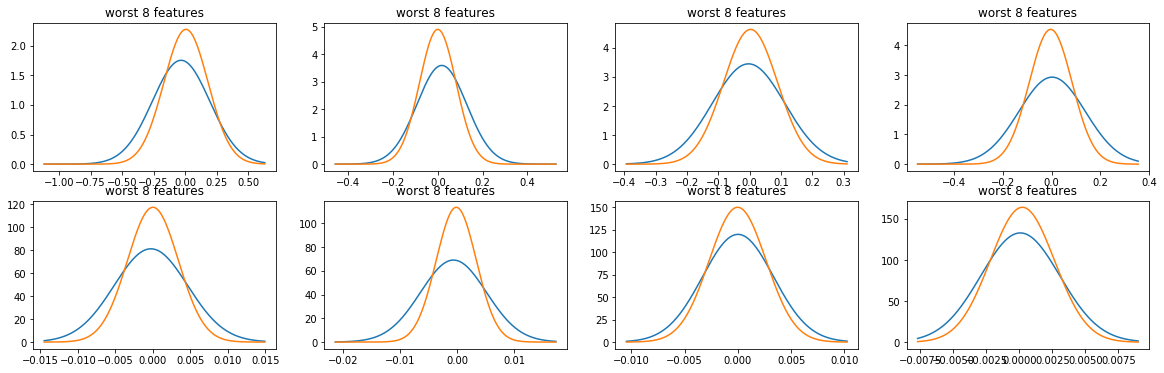

In [24]:
fig3=plt.figure(figsize=(20,6))
for i in range(len(best_8)):
    fig3.add_subplot(2,4,i+1)
    x_min = min(min(foreground.T[worst_8[i]]),min(background.T[worst_8[i]]))
    x_max = max(max(foreground.T[worst_8[i]]),max(background.T[worst_8[i]]))
    x = np.linspace(x_min,x_max,500)
    y_cheetah = norm.pdf(x,mean_FG[worst_8[i]],np.sqrt(var_FG[worst_8[i]]))
    y_grass = norm.pdf(x,mean_BG[worst_8[i]],np.sqrt(var_BG[worst_8[i]]))
    plt.plot(x,y_cheetah,x,y_grass)
    title = "worst 8 features"
    plt.title(title)
plt.show()

In [26]:
# define the zigzag transformation
zig_zag = np.array([[0,1,5,6,14,15,27,28],[2,4,7,13,16,26,29,42],[3,8,12,17,25,30,41,43],
                   [9,11,18,24,31,40,44,53],[10,19,23,32,39,45,52,54],[20,22,33,38,46,51,55,60],
                   [21,34,37,47,50,56,59,61],[35,36,48,49,57,58,62,63]])
zz_flat = zig_zag.flatten()
def zig_zag_transform(a):
    result = np.zeros(64)
    for i in range(64):
        result[zz_flat[i]] = a[i]
    return result

In [27]:
# 2D DCT function
import scipy.fftpack
def dct2d(a):
    return scipy.fftpack.dct(scipy.fftpack.dct( a, axis=0, norm='ortho' ),axis=1,norm='ortho')

In [28]:
import imageio
im = imageio.imread('../homework1/cheetah.bmp')
im_array = np.array(im)

#### Guassian Classifier using all 64 features. Be adviced the covariance matrix of two classes are different.

In [29]:
from numpy.linalg import inv,det
A = []
cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)
for i in range(0,len(im_array)-8):
    for j in range(0,im_array.shape[1]-8):
        FG,BG = 0,0
        row_start,row_end = i,i+8
        col_start,col_end = j,j+8
        block = im_array[row_start:row_end,col_start:col_end]
        block_dct = dct2d(block).flatten()
        block_dct = zig_zag_transform(block_dct)
        # foreground
        temp = block_dct - mean_FG
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
        FG = temp2 + temp3
        #background
        temp = block_dct - mean_BG
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
        BG = temp2 + temp3
        if FG >= BG:
            A.append(0)
        else:
            A.append(1)
A = np.array(A)
print(A.shape)

(64714,)


In [30]:
A_matrix = np.reshape(A,(247,262))
A_matrix_padding_0 = np.lib.pad(A_matrix,(4,4),'constant',constant_values = 0)

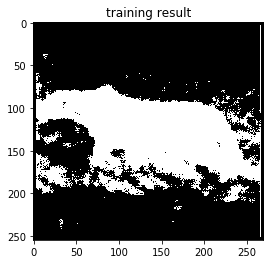

In [31]:
plt.imshow(A_matrix_padding_0,cmap='gray')
plt.title("training result")
plt.show()

In [32]:
foreground_best8 = foreground[:,best_8]
background_best8 = background[:,best_8]
print(foreground_best8.shape)

(250, 8)


#### Guassian Classifier using the best 8 features.

In [33]:
A = []
mean_FG_best8 = np.mean(foreground_best8,axis = 0)
mean_BG_best8 = np.mean(background_best8,axis = 0)
cov_FG_best8 = np.cov(foreground_best8.T)
cov_BG_best8 = np.cov(background_best8.T)
cov_FG_best8_inv = inv(cov_FG_best8)
cov_BG_best8_inv = inv(cov_BG_best8)
cov_FG_det = det(cov_FG_best8)
cov_BG_det = det(cov_BG_best8)
for i in range(0,len(im_array)-8):
    for j in range(0,im_array.shape[1]-8):
        FG,BG = 0,0
        row_start,row_end = i,i+8
        col_start,col_end = j,j+8
        block = im_array[row_start:row_end,col_start:col_end]
        block_dct = dct2d(block).flatten()
        block_dct= zig_zag_transform(block_dct)[best_8]
        #foreground
        temp = block_dct - mean_FG_best8
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_FG_best8_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
        FG = temp2 + temp3
        #background
        temp = block_dct - mean_BG_best8
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_BG_best8_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
        BG = temp2 + temp3
        if FG >= BG:
            A.append(0)
        else:
            A.append(1)
A = np.array(A)
print(A.shape)

(64714,)


In [34]:
# padding
A_matrix = np.reshape(A,(247,262))
A_matrix_padding_1 = np.lib.pad(A_matrix,(4,4),'constant',constant_values = 0)

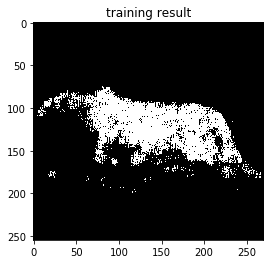

In [35]:
plt.imshow(A_matrix_padding_1,cmap='gray')
plt.title("training result")
plt.show()

In [36]:
# store the test data as a numpy array
im_test = imageio.imread('../homework1/cheetah_mask.bmp')
im_test_array = np.array(im_test)
# convert 255 to 1 for error calculation
im_test_array = im_test_array / 255

In [37]:
# calculate the probability of error
e0 = np.absolute(im_test_array - A_matrix_padding_0)
e1 = np.absolute(im_test_array - A_matrix_padding_1)
prob_error_64 = np.sum(e0) / (255 * 270)
prob_error_8 = np.sum(e1) / (255 * 270)

In [38]:
print('probability of error using all 64 features ',prob_error_64)
print('probability of error using all 8 features ',prob_error_8)

probability of error using all 64 features  0.11664488017429193
probability of error using all 8 features  0.06944081336238199


#### As we can see from the classification result as well as the probability of error. The result using 8 best features is better using all 64 features. If we use the worst 8 features for classfication the result will be completely blank. So we can see some bad features can make the classification result worse. Furthermore the most important feature is the first feature. As we can see from the marginal density, for the first feature the means of foreground and background are well seperated. The classificaiton result without the first feature will be garbage.